In [1]:
import matplotlib.pyplot as plt
from src.pvsys import ShadedArray

In [2]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [
            CB91_Blue,
            CB91_Amber,
            CB91_Green,
            CB91_Violet,
            CB91_Pink,
            CB91_Purple,
            ]
              
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")

In [3]:
IRRADIANCE = 1000
CELL_TEMP = 25
TEMPERATURE = ShadedArray.ambient_temp_from_cell(IRRADIANCE, CELL_TEMP)

pvsyss = ShadedArray.get_default_array()

In [4]:
pvsyss.simulate(
        duty_cycle=0.0,
        irradiance=[IRRADIANCE, ] * 4,
        ambient_temperature=[TEMPERATURE, ] * 4,
    )
curve = pvsyss.get_shaded_iv_curve(curve_points=1000)
power = pvsyss.power(curve.voltage, curve.current)
mpp = pvsyss.mpp_from_curve(curve)

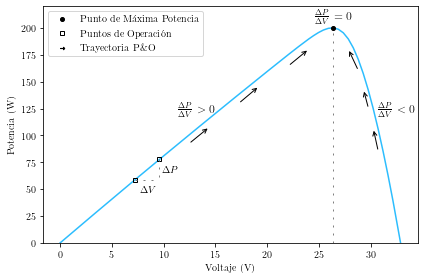

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Potencia (W)")

power = pvsyss.power(curve.voltage, curve.current)
ax.plot(curve.voltage, power)
ax.plot(mpp.voltage, mpp.current * mpp.voltage, 'o', markersize=4, color='k', label='Punto de Máxima Potencia')

# plot line from mpp to x axis
ax.plot([mpp.voltage, mpp.voltage], [0, mpp.current * mpp.voltage], '--', dashes=(2,6), color='0.5', linewidth=1.0)

# add text to mpp
ax.text(mpp.voltage, mpp.current * mpp.voltage * 1.04, '$\\frac{\Delta P}{\Delta V} = 0$', fontsize=12, ha='center', va='baseline')

# add text to the left of the mpp
ax.text(mpp.voltage * 0.5, mpp.current * mpp.voltage * 0.61, '$\\frac{\Delta P}{\Delta V} > 0$', fontsize=12, ha='center', va='baseline')

# add text to the right of the mpp
ax.text(mpp.voltage * 1.23, mpp.current * mpp.voltage * 0.61, '$\\frac{\Delta P}{\Delta V} < 0$', fontsize=12, ha='center', va='baseline')

points_x = curve.voltage[150], curve.voltage[200]
points_y = power[150], power[200]
# mark the points at points_x, points_y
ax.plot(points_x, points_y, 's', markersize=4, color='k', markerfacecolor='none', label='Puntos de Operación')
# add a horizontal line perpendicular to the line between points_x, points_y
ax.plot([points_x[0], points_x[1]], [points_y[0], points_y[0]], '--', dashes=(2,6), color='0.5', linewidth=1.0)
# add a verticle line perpendicular at the intersection of the line between points_x, points_y
ax.plot([points_x[1], points_x[1]], [points_y[1], points_y[0]], '--', dashes=(2,6), color='0.5', linewidth=1.0)
# add the text 'delta v' at the middle of the line between points_x, points_y, below the line
ax.text((points_x[0] + points_x[1]) / 2, points_y[0] * .8, '$\Delta V$', fontsize=10, ha='center', va='baseline')
# add the text 'delta p' at the middle of the perpendicular line between points_x, points_y, to the right of the line
ax.text(points_x[1] * 1.1, points_y[0] * 1.13, '$\Delta P$', fontsize=10, ha='center', va='baseline')

# plot an arrow from the 300th point to the 400th point below the line
ax.annotate('', xy=(curve.voltage[500], power[500]*0.95), xytext=(curve.voltage[460], power[460]*0.94), arrowprops=dict(arrowstyle='->'), )
ax.annotate('', xy=(curve.voltage[400], power[400]*0.95), xytext=(curve.voltage[360], power[360]*0.94), arrowprops=dict(arrowstyle='->'), )
ax.annotate('', xy=(curve.voltage[300], power[300]*0.93), xytext=(curve.voltage[260], power[260]*0.92), arrowprops=dict(arrowstyle='->'), )
ax.annotate('', xy=(curve.voltage[580], power[580]*0.95), xytext=(curve.voltage[596], power[598]*0.94), arrowprops=dict(arrowstyle='->'), )
ax.annotate('', xy=(curve.voltage[616]*.985, power[616]), xytext=(curve.voltage[634]*.985, power[634]), arrowprops=dict(arrowstyle='->'), )
ax.annotate('', xy=(curve.voltage[640]*.985, power[640]), xytext=(curve.voltage[645]*.985, power[645]), arrowprops=dict(arrowstyle='->'), )

# add dummy scatter points to obtain a legend of an arrow
ax.scatter( [] , [], color='k', marker=r'$\rightarrow$',s=20, label='Trayectoria P\&O' )

# set y limit to max power * 1.1
ax.set_ylim(0, power.max() * 1.1)

ax.legend(loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig(r'output/ch2_mppt_po_dynamic.pdf', bbox_inches='tight')

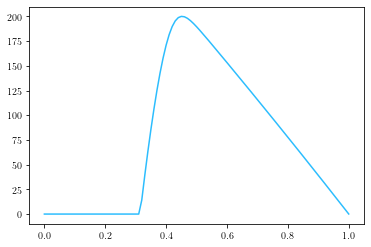

In [6]:
plt.plot(curve.duty_cycle, power)

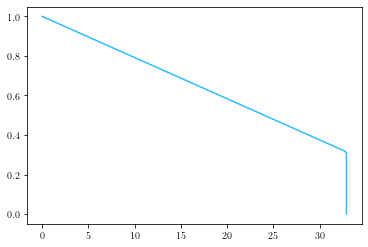

In [7]:
plt.plot(curve.voltage, curve.duty_cycle)

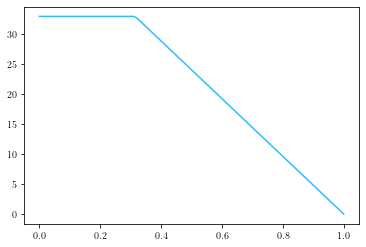

In [8]:
plt.plot(curve.duty_cycle, curve.voltage)